## Using low dimensional embeddings to discover subtypes of breast cancer

This notebook is largely based on https://towardsdatascience.com/reduce-dimensions-for-single-cell-4224778a2d67 (credit to Nikolay Oskolkov).

notes:

- compare LDA to PCA results
- test different methods? or change parameter of one method? 


https://www.nature.com/articles/s41467-018-07582-3#data-availability

In [2]:
import pandas as pd
import numpy as np
import GEOparse
from matplotlib import pyplot as plt

In [3]:
GEO_ID = "GSE111229" # from the article 

#### Exercise 1. load the dataset into `rna_seq` using GEOparse.

In [4]:
# %load solutions/ex4_1.py
rna_seq = GEOparse.get_GEO(geo=GEO_ID, destdir="./")

24-May-2022 14:12:31 DEBUG utils - Directory ./ already exists. Skipping.
24-May-2022 14:12:31 INFO GEOparse - File already exist: using local version.
24-May-2022 14:12:31 INFO GEOparse - Parsing ./GSE111229_family.soft.gz: 
24-May-2022 14:12:31 DEBUG GEOparse - DATABASE: GeoMiame
24-May-2022 14:12:31 DEBUG GEOparse - SERIES: GSE111229
24-May-2022 14:12:31 DEBUG GEOparse - PLATFORM: GPL13112
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025845
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025846
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025847
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025848
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025849
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025850
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025851
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025852
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025853
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025854
24-May-2022 14:12:31 DEBUG GEOpars

24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025982
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025983
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025984
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025985
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025986
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025987
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025988
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025989
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025990
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025991
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025992
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025993
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025994
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025995
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025996
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025997
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3025998
24-May-2022 14:12:31 DEBUG GEOp

24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026126
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026127
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026128
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026129
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026130
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026131
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026132
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026133
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026134
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026135
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026136
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026137
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026138
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026139
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026140
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026141
24-May-2022 14:12:31 DEBUG GEOparse - SAMPLE: GSM3026142
24-May-2022 14:12:31 DEBUG GEOp

24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026270
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026271
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026272
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026273
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026274
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026275
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026276
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026277
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026278
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026279
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026280
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026281
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026282
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026283
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026284
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026285
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026286
24-May-2022 14:12:32 DEBUG GEOp

24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026414
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026415
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026416
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026417
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026418
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026419
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026420
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026421
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026422
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026423
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026424
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026425
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026426
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026427
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026428
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026429
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026430
24-May-2022 14:12:32 DEBUG GEOp

24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026558
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026559
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026560
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026561
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026562
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026563
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026564
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026565
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026566
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026567
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026568
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026569
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026570
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026571
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026572
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026573
24-May-2022 14:12:32 DEBUG GEOparse - SAMPLE: GSM3026574
24-May-2022 14:12:32 DEBUG GEOp

In [5]:
dir(rna_seq)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_metadata_as_string',
 '_get_object_as_soft',
 '_phenotype_data',
 'database',
 'download_SRA',
 'download_supplementary_files',
 'geotype',
 'get_accession',
 'get_metadata_attribute',
 'get_type',
 'gpls',
 'gsms',
 'merge_and_average',
 'metadata',
 'name',
 'phenotype_data',
 'pivot_and_annotate',
 'pivot_samples',
 'relations',
 'show_metadata',
 'to_soft']

In [6]:
rna_seq.download_SRA??

In [7]:
rna_seq.geotype

'SERIES'

In [8]:
rna_seq.phenotype_data.shape

(768, 37)

In [9]:
rna_seq.phenotype_data.shape

(768, 37)

In [10]:
rna_seq.to_soft('test', False)

In [11]:
cafs = pd.read_csv('data/CAFs.txt', sep='\t')

In [12]:
sorted(cafs.cluster.unique())

[1, 2, 3, 4]

In [13]:
expr = cafs

### The expression matrix
716 cells has been sequenced, and the expression levels has been assessed for 558 genes. Arranging the cells as rows and genes as columns we obtain an *expression matrix*.

In [14]:
expr.shape

(716, 558)

In [15]:
expr

,1110020A21Rik,1110046J04Rik,1190002F15Rik,1500015A07Rik,1500015O10Rik,1700010K23Rik,1700012D01Rik,1810011H11Rik,2010204K13Rik,2310057J18Rik,...,Wif1,Wisp2,Yy2,Zfp2,Zfp36,Zfp454,Zfp652os,Zfp81,Zfp944,cluster
SS2_15_0048_A3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,107.526495,0.0,201.533078,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A6,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,230.755035,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,175.071938,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,375.177236,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,290.743379,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A4,0.000000,0.0,0.000000,0.0,891.488043,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2
SS2_15_0048_A1,43.324338,0.0,0.000000,0.0,0.000000,0.0,0.0,20.527119,65.766243,0.000000,...,0.0,0.0,0.000000,0.0,768.997431,0.000000,0.0,0.0,2.413509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS2_15_0049_P19,0.000000,0.0,0.000000,0.0,1012.999120,0.0,0.0,0.000000,37.231979,0.000000,...,0.0,0.0,21.453518,0.0,19.602162,1.869748,0.0,0.0,34.520490,3
SS2_15_0049_P18,37.696628,0.0,0.000000,0.0,1562.238996,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,41.641731,0.000000,0.0,0.0,0.000000,2
SS2_15_0049_P21,0.000000,0.0,53.257827,0.0,5.817578,0.0,0.0,112.228306,62.542484,19.583052,...,0.0,0.0,0.000000,0.0,70.246018,0.000000,0.0,0.0,0.000000,1
SS2_15_0049_P23,0.000000,0.0,0.000000,0.0,2411.205731,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,55.993812,2


Before going further, try to reflect for a moment how you would try to illuminate any pattern in this data, given what you already know.

#### Plot the expression matrix

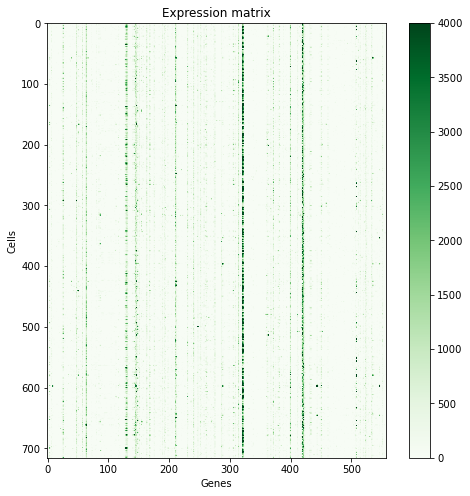

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(expr.values, cmap='Greens', vmax=4000, vmin=0)
plt.title('Expression matrix')
plt.ylabel('Cells')
plt.xlabel('Genes')
plt.colorbar()
plt.show()

#### Exercise 2. The data is very sparse (most entries are zero), can you quantify how sparse it is? (i.e. how many of the entries are 0) 

In [17]:
# %load solutions/ex4_2.py
np.count_nonzero(expr.values) / np.prod(expr.shape)

# only 20% of the entries are non-zero.

0.19622154141887427

In [18]:
print("\n" + "Dimensions of input file: " + str(expr.shape) + "\n")
print("\n" + "Last column corresponds to cluster assignments: " + "\n")
print(expr.iloc[0:4, (expr.shape[1]-4):expr.shape[1]])
X = expr.values[:,0:(expr.shape[1]-1)]
Y = expr.values[:,expr.shape[1]-1] #cluster
X = np.log(X + 1)


Dimensions of input file: (716, 558)


Last column corresponds to cluster assignments: 

                Zfp652os  Zfp81  Zfp944  cluster
SS2_15_0048_A3       0.0    0.0     0.0        1
SS2_15_0048_A6       0.0    0.0     0.0        1
SS2_15_0048_A5       0.0    0.0     0.0        1
SS2_15_0048_A4       0.0    0.0     0.0        2


### TASK 1. How many cells belongs to each cluster (1-4)?  Is some cluster over-represented? 

In [19]:
# Your answer

In [20]:
cafs.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

### Decomposing the signals
Now that we have gained some basic understanding of the data, we see it is fit for machine learning. You have already seen a few techniques to reduce data dimensionality reduction. We start with PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
#from matplotlib import cm
#dir(cm) # available colors

#### Exercise 3. Perform PCA on the expression data and visualize the results (with colors to represent the ground truth clusters)


### TASK 2. Can we add % for PC2 and PC1 to the plot? 

Text(0, 0.5, 'PC2')

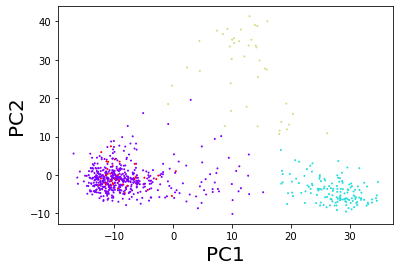

In [23]:
# %load solutions/ex4_3.py
model = PCA()
pca = model.fit_transform(X)
plt.scatter(pca[:, 0], pca[:, 1], c = Y, cmap = 'rainbow', s = 1)
plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)



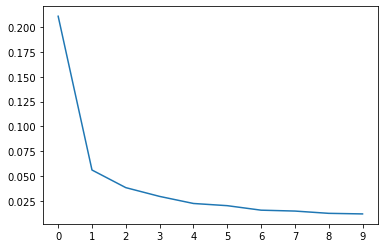

In [29]:
plt.plot(model.explained_variance_ratio_[:10])
plt.xticks(range(10));plt.show()

### TASK 3. Try SparsePCA?

In [2]:
#funtion is SparsePCA, or maybe you can check help from sklearn.


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

        Gene      Score
422    Rn45s  39.249111
64       B2m  12.880958
212     Fth1   8.174487
287    Lars2   7.385672
147     Cst3   6.857356
315   Malat1   6.290840
420     Rgs5   4.681367
524    Timp1   4.486659
131   Col3a1   3.229705
130   Col1a2   3.062976
537  Trmt61b   3.020343
145    Crip1   2.991499
322      Mgp   2.787057
368      Mt1   2.673895
400    Postn   2.401428
534     Tpm1   2.258763
248    Hspa5   2.133318
241   Higd1b   2.094767
220     Ggt1   2.003810
122    Cldn4   1.951643


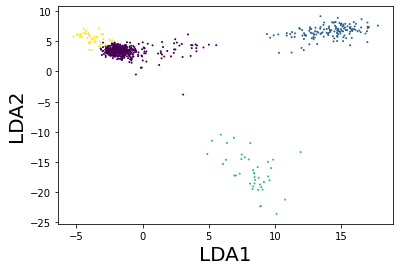

In [40]:
model = LinearDiscriminantAnalysis(n_components = 2, priors = None, shrinkage = 'auto', 
                                   solver = 'eigen', store_covariance = False, tol = 0.0001)
lda = model.fit_transform(X, Y)
plt.scatter(lda[:, 0], lda[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.xlabel("LDA1", fontsize = 20); plt.ylabel("LDA2", fontsize = 20)
feature_importances = pd.DataFrame({'Gene':np.array(expr.columns)[:-1], 
                                    'Score':abs(model.coef_[0])})
print(feature_importances.sort_values('Score', ascending = False).head(20))

The way to interpret the data above: we clearly see the data lay in three clusters, suggesting  we have found 3 different separable expression-signatures. However, we also see one cluster is occupied by 2 clusters (the colors are imposed by the fact that we know the "ground truth", but unsupervised methods are generally used for data exploration in which we do not know of these things.


# Non-linear methods

# t-SNE

t-SNE is a very popular decomposition technique used in molecular biology, especially for visualization purposes. t-SNE does generally not cope well with high dimensionality, so it is common to first transform the data with PCA and then run this through t-SNE. Here we will do both with and without prereducing the dimensionality.


https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


In [41]:
from sklearn.manifold import TSNE

In [42]:
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne = model.fit_transform(X)

/Users/tiinatuononen/opt/anaconda3/envs/cbm101/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Text(0, 0.5, 'tSNE2')

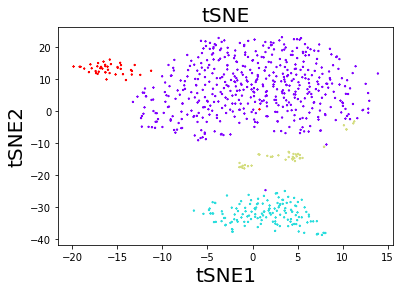

In [43]:
plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

#### Exercise 4. Reduce the data first with PCA to 30 principal components, then rerun the tSNE on this transformed data. 

/Users/tiinatuononen/opt/anaconda3/envs/cbm101/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Text(0, 0.5, 'tSNE2')

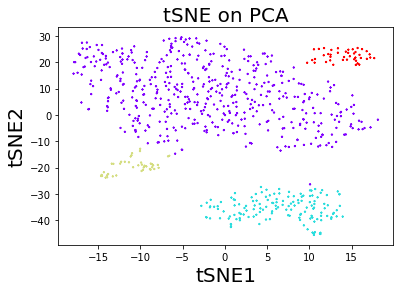

In [44]:
# %load solutions/ex4_4.py
X_reduced = PCA(n_components = 30).fit_transform(X)
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne = model.fit_transform(X_reduced)

plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE on PCA', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

### TASK 4. Try different perplexity values (from range 5 to 50)

You can maybe just modify the code above. 


